In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress as lr

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

from clim_utils import label_latlon
from clim_utils import LinearRegression_Map

### RMM Index

First 2 PCs (daily) of Combined EOF (variables including OLR, u850, and u200)

'/homes/khuang8/clim680/MJO_PC_INDEX.1979-2013.nc'

In [2]:
file_rmm='/homes/khuang8/clim680/MJO_PC_INDEX.1979-2013.nc'
ds_rmm=xr.open_dataset(file_rmm)
ds_rmm

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * var        (var) int64 1 2 3
  * eof        (eof) int64 1 2
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
Data variables:
    ceof       (var, eof, lon) float64 ...
    PC1        (time) float64 ...
    PC2        (time) float64 ...
    MJO_INDEX  (time) float64 ...

### OLR Data
NOAA Daily OLR '/shared/ccsm4/khuang/obs/NOAA-OLR/NOAA.OLR.daily.mean.1979-2019.nc'

In [3]:
file='/shared/ccsm4/khuang/obs/NOAA-OLR/NOAA.OLR.daily.mean.1979-2019.nc'
ds_olr=xr.open_dataset(file)
ds_olr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 16650)
Coordinates:
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

In [4]:
ds_olr=ds_olr.sel(time=slice(ds_rmm['time'][0], ds_rmm['time'][-1]))
ds_olr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 12784)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

### Make anomalies of our OLR data

`goupby`

In [5]:
ds_olrclm    = ds_olr.groupby('time.dayofyear').mean()
ds_anoms     = ds_olr.groupby('time.dayofyear')-ds_olrclm
ds_anoms

<xarray.Dataset>
Dimensions:    (lat: 73, lon: 144, time: 12784)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364 365
Data variables:
    olr        (time, lat, lon) float32 -3.2585602 -3.2585602 ... 0.040283203

### Regress OLR anomalies against the RMM index

`LinearRegression_Map`

In [6]:
nx = len(ds_anoms['lon'])
ny = len(ds_anoms['lat'])

p1_array = np.zeros((ny,nx))
r1_array = np.zeros((ny,nx))
m1_array = np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        
        x=ds_rmm['PC1']
        y=ds_anoms['olr'][:,j,i]
        
        m,b,r,p,e=lr(x,y)
        
        m1_array[j,i]=m
        r1_array[j,i]=r
        p1_array[j,i]=p 

m1_array

array([[ 0.041692  ,  0.041692  ,  0.041692  , ...,  0.041692  ,
         0.041692  ,  0.041692  ],
       [ 0.1319263 ,  0.12880322,  0.12773374, ...,  0.19797755,
         0.18514219,  0.15755767],
       [ 0.17096661,  0.12542412,  0.11925231, ...,  0.207368  ,
         0.20084495,  0.19712209],
       ...,
       [-0.00075615, -0.00494947, -0.00686867, ...,  0.01191751,
         0.00839838,  0.00409868],
       [ 0.00457421,  0.0048448 ,  0.0059533 , ...,  0.0257477 ,
         0.0252587 ,  0.02603456],
       [ 0.06537119,  0.06537119,  0.06537119, ...,  0.06537119,
         0.06537119,  0.06537119]])

In [7]:
nx = len(ds_anoms['lon'])
ny = len(ds_anoms['lat'])

p2_array = np.zeros((ny,nx))
r2_array = np.zeros((ny,nx))
m2_array = np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        
        x=ds_rmm['PC2']
        y=ds_anoms['olr'][:,j,i]
        
        m,b,r,p,e=lr(x,y)
        
        m2_array[j,i]=m
        r2_array[j,i]=r
        p2_array[j,i]=p 

m2_array

array([[ 0.1391273 ,  0.1391273 ,  0.1391273 , ...,  0.1391273 ,
         0.1391273 ,  0.1391273 ],
       [ 0.20745185,  0.20888995,  0.20948104, ...,  0.17254597,
         0.17578028,  0.18658199],
       [ 0.20857101,  0.25029436,  0.25312253, ...,  0.16669045,
         0.17565352,  0.17602925],
       ...,
       [-0.20601224, -0.21279568, -0.22005977, ..., -0.1754905 ,
        -0.18205172, -0.18833712],
       [-0.19709328, -0.19906101, -0.20107332, ..., -0.17331235,
        -0.17556347, -0.17641318],
       [-0.06511905, -0.06511905, -0.06511905, ..., -0.06511905,
        -0.06511905, -0.06511905]])

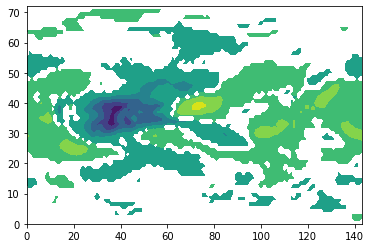

In [8]:
p=0.05
mask_m1=np.where(p1_array<0.05,m1_array,np.nan)
mask_m1
plt.contourf(mask_m1)

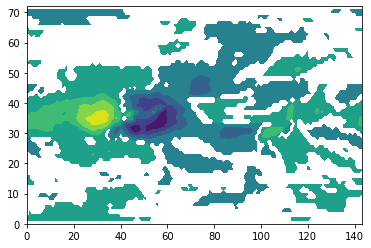

In [9]:
mask_m2=np.where(p2_array<0.05,m2_array,np.nan)
mask_m2
plt.contourf(mask_m2)

In [10]:
lr_olr=[m1_array,
        m2_array]
lr_olr

[array([[ 0.041692  ,  0.041692  ,  0.041692  , ...,  0.041692  ,
          0.041692  ,  0.041692  ],
        [ 0.1319263 ,  0.12880322,  0.12773374, ...,  0.19797755,
          0.18514219,  0.15755767],
        [ 0.17096661,  0.12542412,  0.11925231, ...,  0.207368  ,
          0.20084495,  0.19712209],
        ...,
        [-0.00075615, -0.00494947, -0.00686867, ...,  0.01191751,
          0.00839838,  0.00409868],
        [ 0.00457421,  0.0048448 ,  0.0059533 , ...,  0.0257477 ,
          0.0252587 ,  0.02603456],
        [ 0.06537119,  0.06537119,  0.06537119, ...,  0.06537119,
          0.06537119,  0.06537119]]),
 array([[ 0.1391273 ,  0.1391273 ,  0.1391273 , ...,  0.1391273 ,
          0.1391273 ,  0.1391273 ],
        [ 0.20745185,  0.20888995,  0.20948104, ...,  0.17254597,
          0.17578028,  0.18658199],
        [ 0.20857101,  0.25029436,  0.25312253, ...,  0.16669045,
          0.17565352,  0.17602925],
        ...,
        [-0.20601224, -0.21279568, -0.22005977, ..., -

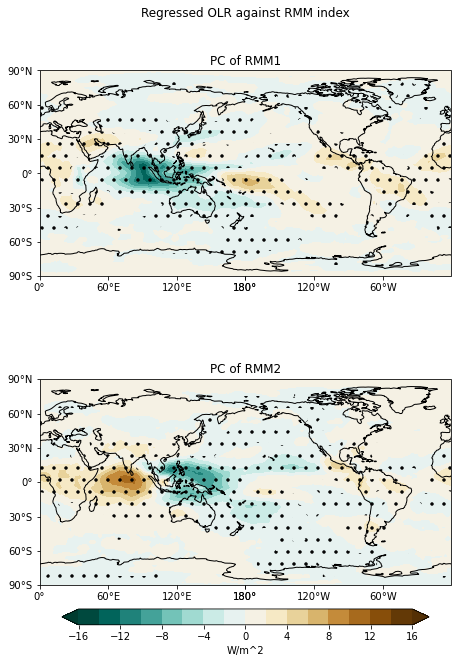

In [11]:
mask_lr=[mask_m1,
         mask_m2,]

labels=['PC of RMM1',
        'PC of RMM2']

clevs=np.arange(-16,18,2)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)},
                        figsize=(8.5,11))

axs=axs.flatten()

for i,phase in enumerate(lr_olr):
    data=lr_olr[i]
    # Add the cyclic point
    data,lons=add_cyclic_point(data,coord=ds_anoms['lon'])
    mask_data,lons=add_cyclic_point(mask_lr[i],coord=ds_anoms['lon'])
    # Contour plot
    cs=axs[i].contourf(lons,ds_anoms['lat'],data,clevs,
                       transform = ccrs.PlateCarree(),
                       cmap='BrBG_r',extend='both')
    
    axs[i].contourf(lons,ds_anoms['lat'],mask_data,[0,1],
                 transform = ccrs.PlateCarree(),colors='None',
                 hatches=['.',''],extend='both',alpha=0)
    
    label_latlon(axs[i],np.arange(-180,181,60),np.arange(-90,91,30))
    
    axs[i].set_title(labels[i])
    
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                        wspace=0.25, hspace=0.5)
        

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='W/m^2')

# Add a big title at the top
plt.suptitle('Regressed OLR against RMM index')
plt.savefig('MJO_RMM1&2_regression_ttest.png')

### Write data to a .nc file

In [12]:
ds_m1=xr.DataArray(m1_array,
                  coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                  dims=['lat','lon'])        
ds_m1=ds_m1.to_dataset(name='olr')
ds_m1

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float64 0.04169 0.04169 0.04169 ... 0.06537 0.06537

In [13]:
ds_p1=xr.DataArray(p1_array,
                  coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                          dims=['lat','lon'])        
ds_p1=ds_p1.to_dataset(name='pvalue')
ds_p1

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    pvalue   (lat, lon) float64 0.6454 0.6454 0.6454 ... 0.4351 0.4351 0.4351

In [14]:
ds_r1=xr.DataArray(r1_array,
                  coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                          dims=['lat','lon'])        
ds_r1=ds_r1.to_dataset(name='rvalue')
ds_r1

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    rvalue   (lat, lon) float64 0.00407 0.00407 0.00407 ... 0.006904 0.006904

In [15]:
ds_regr1=xr.merge([ds_m1,ds_p1,ds_r1])
ds_regr1

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float64 0.04169 0.04169 0.04169 ... 0.06537 0.06537
    pvalue   (lat, lon) float64 0.6454 0.6454 0.6454 ... 0.4351 0.4351 0.4351
    rvalue   (lat, lon) float64 0.00407 0.00407 0.00407 ... 0.006904 0.006904

In [16]:
ds_regr1.to_netcdf('RMM1.OLR.regression.nc')

In [17]:
ds_m2=xr.DataArray(m2_array,
                  coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                  dims=['lat','lon'])        
ds_m2=ds_m2.to_dataset(name='olr')
ds_m2

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float64 0.1391 0.1391 0.1391 ... -0.06512 -0.06512

In [18]:
ds_p2=xr.DataArray(p2_array,
                  coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                          dims=['lat','lon'])        
ds_p2=ds_p2.to_dataset(name='pvalue')
ds_p2

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    pvalue   (lat, lon) float64 0.1246 0.1246 0.1246 ... 0.4369 0.4369 0.4369

In [19]:
ds_r2=xr.DataArray(r2_array,
                  coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                          dims=['lat','lon'])        
ds_r2=ds_r2.to_dataset(name='rvalue')
ds_r2

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    rvalue   (lat, lon) float64 0.01358 0.01358 0.01358 ... -0.006877 -0.006877

In [20]:
ds_regr2=xr.merge([ds_m2,ds_p2,ds_r2])
ds_regr2

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float64 0.1391 0.1391 0.1391 ... -0.06512 -0.06512
    pvalue   (lat, lon) float64 0.1246 0.1246 0.1246 ... 0.4369 0.4369 0.4369
    rvalue   (lat, lon) float64 0.01358 0.01358 0.01358 ... -0.006877 -0.006877

In [21]:
ds_regr2.to_netcdf('RMM2.OLR.regression.nc')